In [7]:
import pickle
dump_directory = "/home/srivbane/shared/caringbridge/data/projects/place-project/DataResults"
cluster_data = pickle.load(open("{}/ClusterResults/hour-0/cluster-0001.res".format(dump_directory), "rb"))

<IPython.core.display.Javascript object>


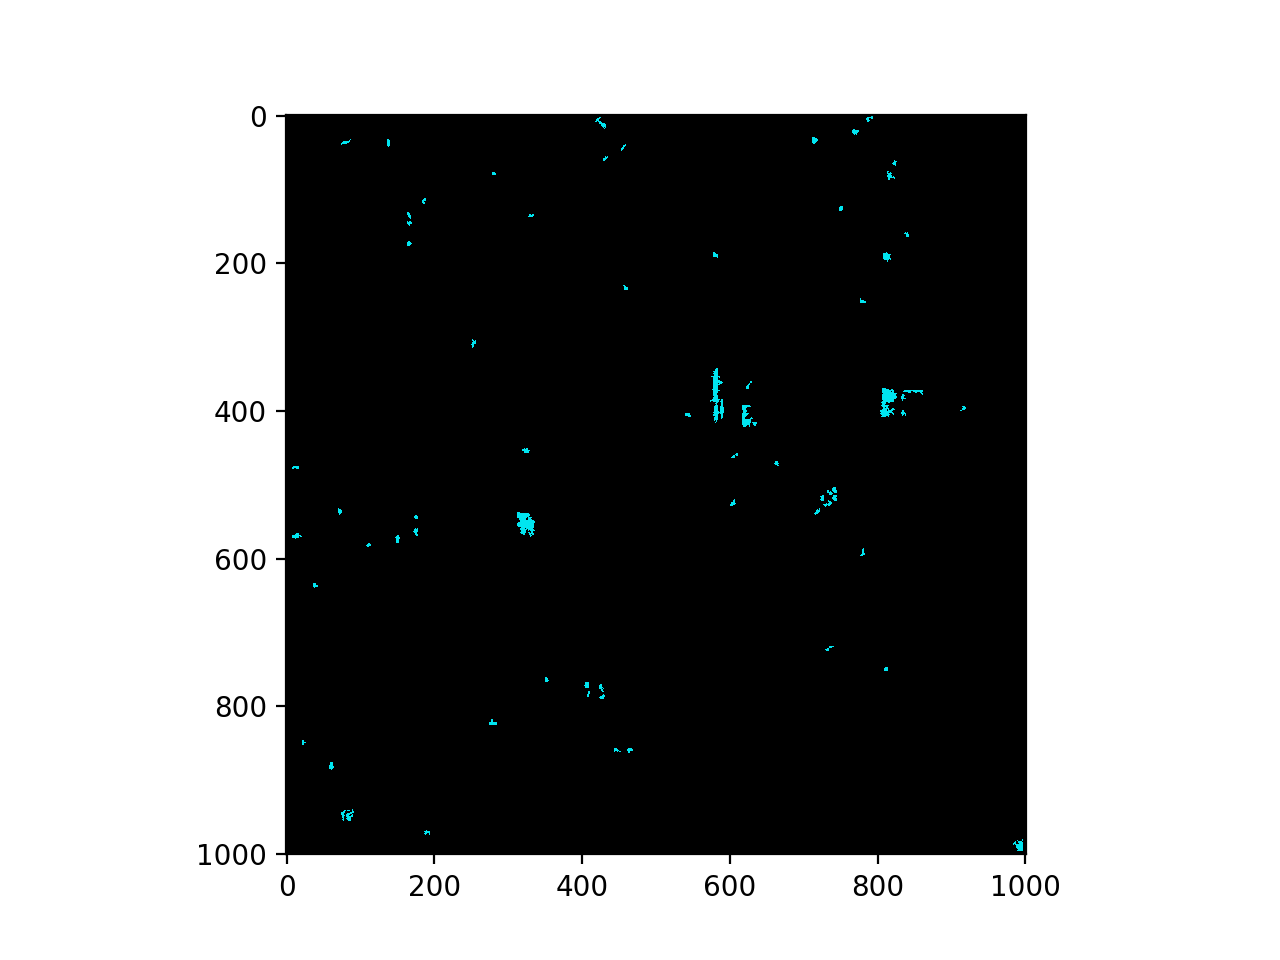

In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
data = np.zeros( (1001,1001,3), dtype=np.uint8)
for var in cluster_data:
    for x,y in var:
        data[x][y] = (0, 229, 240)
plt.imshow(data, interpolation='nearest')
plt.show()